In [1]:
import time
start_time = time.time()

# Cleaning data - changing everything into neumeric value

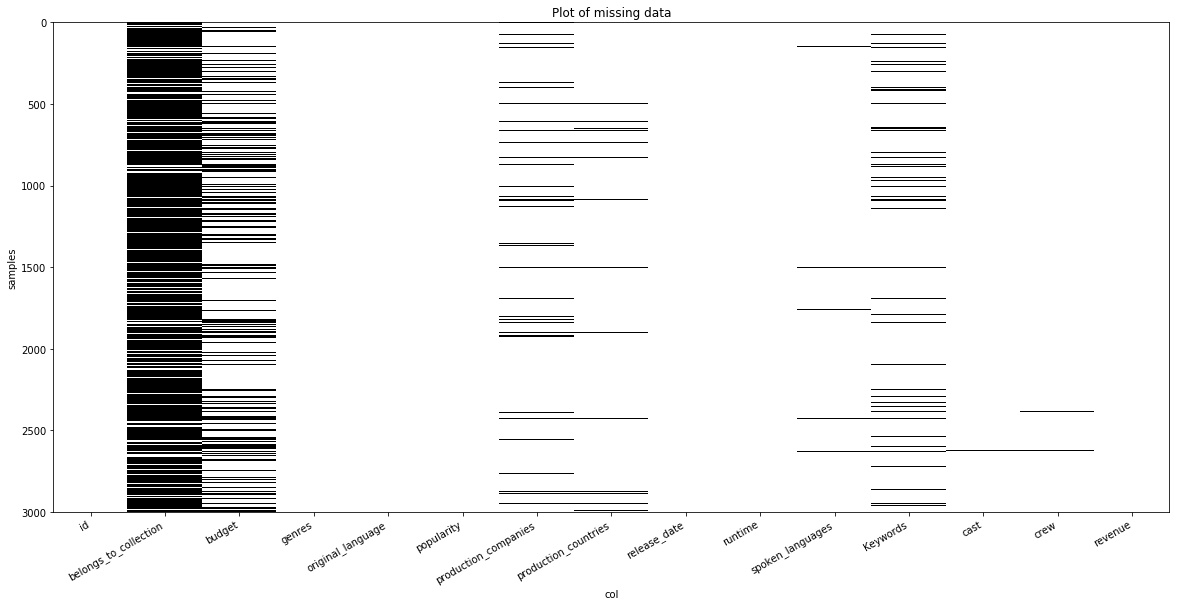

2340.1126861572266


,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,Keywords,cast,crew,revenue
0,1,[313576],14000000.0,[35],0,6.575393,"[4, 60, 8411]",[0],2/20/15,93.0,[0],"[4379, 9663, 11830, 179431]","[52997, 64342, 54729, 36801, 54812, 94098, 115...","[1449071, 3227, 347335, 347335, 57822, 1451395...",12314651
1,2,[107674],40000000.0,"[35, 18, 10751, 10749]",0,8.248895,[2],[0],8/6/2004,113.0,[0],"[2505, 4263, 6038, 13072]","[1813, 5823, 1210, 655, 33656, 62064, 68287, 1...","[1201, 1214, 4500, 8851, 12970, 38415, 38416, ...",95149435
2,3,[],3300000.0,[18],0,64.299990,"[2266, 3172, 32157]",[0],10/10/2014,105.0,[0],"[1416, 1523, 1640, 2176, 14512, 14819, 33896, ...","[996701, 18999, 129104, 970216, 223012, 159366...","[494, 6745, 9250, 23783, 23786, 53181, 52443, ...",13092000
3,4,[],1200000.0,"[53, 18]",1,3.174936,[],[5],3/9/2012,122.0,"[0, 8]","[10092, 10540, 11734, 14536, 14636, 208364, 22...","[35068, 85047, 1021524, 1093644, 86033, 92686,...","[95510, 95510, 95510]",16000000
4,5,[],NaN,"[28, 53]",2,1.148070,[],[15],2/5/2009,118.0,[11],[],"[84751, 64453, 84752, 1130534]","[84749, 84749]",3923970


In [16]:
import pandas as pd 
import ast
from ast import literal_eval
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np

#setting the file we want to read
file = "train.csv"

#reading from CSV
df = pd.read_csv(file, header= 0, quotechar='"', sep=',', encoding = "ISO-8859-1",keep_default_na=True, 
                dtype = { 'belongs_to_collection' : 'category',  'genres' : 'category', 'original_language' : 'category', 'production_companies' : 'category', 'production_countries' : 'category',  'spoken_languages' : 'category', 'Keywords' : 'category', 'cast' : 'category', 'crew' : 'category'},
                na_values = [0]
                )

#setting the list to be edited
dataList = [ 'belongs_to_collection',  'genres', 'production_companies', 'production_countries',  'spoken_languages', 'Keywords', 'cast', 'crew']
dataID = { 'belongs_to_collection' : 'id',  'genres': 'id', 'production_companies': 'id', 'production_countries': 'iso_3166_1',  'spoken_languages': 'iso_639_1', 'Keywords': 'id', 'cast': 'id', 'crew': 'id'}
dataNeeded = ['id', 'belongs_to_collection', 'budget', 'genres', 'original_language',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'Keywords',
       'cast', 'crew', 'revenue']

#dropping the columns that was not needed
for col in df.keys():
    if not (col in dataNeeded) :
        df = df.drop(columns = col)
        
#http://www.maths.bath.ac.uk/~jjf23/LMR/python/missing.html

fig, ax = plt.subplots(figsize=(20,10))
im = ax.imshow(~df.isna(), aspect='auto')
label = df.keys().tolist()
plt.imshow(~df.isna(), aspect='auto')
plt.xlabel("col")
plt.ylabel("samples")
ax.set_xticks(np.arange(len(label)))
ax.set_xticklabels(label)
fig.autofmt_xdate()
plt.title("Plot of missing data")
plt.gray()
plt.show()

#filling empty list with []
for col in dataList :
    try:
        df[col] = df[col].cat.add_categories('[]',inplace = False)
    except:
        pass
    df[col].fillna( '[]' , inplace = True) 

#changing a sting of list into list
for col in dataList :
    df[[col]] = df[[col]].applymap(literal_eval)     

#changing the dict in the list into ID only
for col in dataList : 
    for row in range(len(df)) :
        for num in range(len(df[col][row])) :
            if not (isinstance(df[col][row][num], int) or isinstance(df[col][row][num], str)):
                df[col][row][num] = df[col][row][num][dataID[col]]    

# getting all unique values
uniqueSpokenLanguage = df['spoken_languages'].apply(pd.Series).stack().value_counts().keys().values.tolist()
for row in range(len(df)) :
    for num in range(len(df['spoken_languages'][row])):
        df['spoken_languages'][row][num] = uniqueSpokenLanguage.index(df.spoken_languages[row][num])

uniqueOrgLanguage = df['original_language'].unique().tolist()
df.original_language = df.original_language.replace(uniqueOrgLanguage,range(len(uniqueOrgLanguage)))

uniqueCountries = df['production_countries'].apply(pd.Series).stack().value_counts().keys().values.tolist()

for row in range(len(df)) :
    for num in range(len(df['production_countries'][row])):
        df['production_countries'][row][num] = uniqueCountries.index(df.production_countries[row][num])
print(time.time() - start_time)
df.head()

In [23]:
#changing the time into numerical value

import multiprocessing
from multiprocessing import Pool
import CleaningFunctions
from functools import partial
from IPython.display import display, clear_output
import math

start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = range(len(df))
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.time2num, df)
    result = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)

df["release_date"] = result

77.4673810005188


# Getting only low variance value for vectors that is too large to compute

In [17]:
# adding the extra columns for the most related crew


start_time = time.time()

if __name__ ==  '__main__': 
  
    iterable = dataList
    pool = multiprocessing.Pool(len(dataList))
    func = partial(CleaningFunctions.Getting3MostRelated, df)
    df_temp = pool.map(func, iterable)
    pool.close()
    pool.join()
    print(time.time() - start_time)
    
for bigCol in range(len(df_temp)):
    for smallCol in df_temp[bigCol][0]:
        df[smallCol] = df_temp[bigCol][0][smallCol]

69.63857865333557


In [18]:
#dropping the extra columns that was already extracted
for col in dataList:
    if(col in df):
        df = df.drop(columns=col)
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,1,14000000.0,0,6.575393,2/20/15,93.0,12314651,313576.0,NaN,NaN,...,NaN,4379.0,9663.0,179431.0,59256.0,94098.0,98879.0,1393375.0,1431552.0,1449071.0
1,2,40000000.0,0,8.248895,8/6/2004,113.0,95149435,107674.0,NaN,NaN,...,NaN,2505.0,4263.0,6038.0,62064.0,303542.0,1665036.0,1214.0,38415.0,38416.0
2,3,3300000.0,0,64.299990,10/10/2014,105.0,13092000,NaN,NaN,NaN,...,NaN,1416.0,1523.0,206298.0,15824.0,16506.0,52939.0,1049456.0,1402475.0,1406825.0
3,4,1200000.0,1,3.174936,3/9/2012,122.0,16000000,NaN,NaN,NaN,...,NaN,10540.0,11734.0,14636.0,35068.0,85047.0,1021524.0,95510.0,NaN,NaN
4,5,NaN,2,1.148070,2/5/2009,118.0,3923970,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,64453.0,84751.0,84752.0,84749.0,NaN,NaN


# Checking if the data make sense

In [19]:
# counting the unique value for each col (idk why i am doing this too lol)
unique_count = {}
for col in df:
    count = df[col].apply(pd.Series).stack().value_counts().tolist()
    unique_count.update({col: count})

In [20]:
for col in unique_count:
    unique_count[col] = unique_count[col][0:100]
    print(col,unique_count[col])

id [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
budget [72, 71, 71, 68, 68, 65, 54, 53, 50, 46, 42, 40, 39, 39, 38, 36, 34, 34, 31, 27, 27, 26, 24, 22, 21, 21, 20, 20, 20, 20, 20, 20, 20, 20, 18, 18, 17, 17, 15, 15, 14, 14, 14, 14, 13, 13, 13, 12, 12, 11, 11, 10, 10, 9, 9, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
original_language [2575, 78, 47, 43, 42, 37, 24, 20, 20, 19, 18, 16, 8, 6, 6, 5, 5, 4, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
popularity [2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Normalizing the data and seperating the train and test set

In [24]:
#from https://medium.com/@urvashilluniya/why-data-normalization-is-necessary-for-machine-learning-models-681b65a05029

from sklearn import preprocessing
#Select numerical columns which needs to be normalized
train_norm = df[df.columns[0:2400]]
test_norm = df[df.columns[2400:3005]]

# Normalize Training Data 
std_scale = preprocessing.StandardScaler().fit(train_norm)
x_train_norm = std_scale.transform(train_norm)

#Converting numpy array to dataframe
training_norm_col = pd.DataFrame(x_train_norm, index=train_norm.index, columns=train_norm.columns) 
df.update(training_norm_col)

df.head()

C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\utils\extmath.py:776: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\sklearn\utils\extmath.py:781: RuntimeWarning: Degrees of freedom <= 0 for slice.
  new_unnormalized_variance = np.nanvar(X, axis=0) * new_sample_count
C:\Users\isabe\Anaconda3\envs\env1\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.731474,-0.419613,-0.317964,-0.155998,0.968522,-0.726722,-0.395691,1.432121,NaN,NaN,...,NaN,-0.171080,-0.287971,1.397179,0.086944,-0.044792,-0.383153,5.278119,2.493693,1.418793
1,-1.730319,0.226211,-0.317964,-0.017714,0.282080,0.223861,0.206703,-0.139912,NaN,NaN,...,NaN,-0.225587,-0.392639,-0.758298,0.104177,0.755727,3.190937,-0.329904,-0.477054,-0.805095
2,-1.729164,-0.685394,-0.317964,4.613849,0.944809,-0.156372,-0.390038,NaN,NaN,NaN,...,NaN,-0.257262,-0.445748,1.731167,-0.179603,-0.341357,-0.487991,3.892715,2.431689,1.352192
3,-1.728009,-0.737557,-0.078653,-0.436981,0.776318,0.651624,-0.368890,NaN,NaN,NaN,...,NaN,0.008119,-0.247829,-0.651415,-0.061500,-0.079385,1.722394,0.049947,NaN,NaN
4,-1.726855,NaN,0.160657,-0.604463,0.575200,0.461507,-0.456710,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118839,-0.080517,-0.415392,0.006599,NaN,NaN


In [25]:
# save to save.csv
df.to_csv('save_Cleaned.csv',index_label = False)
df = pd.read_csv('save_Cleaned.csv')

# Verification for the predicting method

In [65]:
#creating df df_pred to do prediction for those with non-nan values > 2000

predicting_list = []
for col in df:
    if (df[col].count() > 2000):
        predicting_list.append(col)
predicting_list.remove("revenue")

df_pred = pd.read_csv('save_Cleaned.csv')
df_pred = df_pred[predicting_list].copy()

In [74]:
#creating a df_complete that was copied from the origional df with rows that have no missing value

completeList = []
for x in range(len(df)):
    flag = 0
    for col in predicting_list:
        if (np.isnan(df_pred[col][x])):
            flag = 1
    if flag == 0:
        completeList.append(x)      
        
df_complete = pd.DataFrame()
rows = df_pred.loc[completeList]
df_complete = df_complete.append(rows, ignore_index=True)

In [83]:
# calculating the missing rate of df_pred

missing = sum(len(df_pred) - df_pred.count())
assist = sum(df.count())

tar_miss_rate = missing/(missing+assist)
tar_miss_rate

0.06082581221508428

In [129]:
# sampling from df_complete to creat df_complete_sampled for the same missing rate

import random

df_complete_sampled_list = []

for tar_miss_rate in range(6, 30, 3):
    
    tar_miss_rate = tar_miss_rate/100
    df_complete_sampled = df_complete.copy()

    for x in range(len(df_complete)):
        for col in df_complete:
            rand = random.random()
            if (rand <= tar_miss_rate):
                df_complete_sampled[col][x] = np.nan
                
    df_complete_sampled_list.append(df_complete_sampled)

In [130]:
missing_rate_list = []

for df_complete_sampled in df_complete_sampled_list:

    # check df_complete_sampled geh missing rate

    missing = sum(len(df_complete_sampled) - df_complete_sampled.count())
    assist = sum(df_complete_sampled.count())

    miss_rate = missing/(missing+assist)
    missing_rate_list.append(miss_rate)
    print("df_complete_sampled geh missing rate", miss_rate)

    # check df_complete geh missing rate

    missing = sum(len(df_complete) - df_complete.count())
    assist = sum(df_complete.count())

    miss_rate = missing/(missing+assist)
    print("df_complete geh missing rate", miss_rate)

df_complete_sampled geh missing rate 0.060701665825340735
df_complete geh missing rate 0.0
df_complete_sampled geh missing rate 0.08993774188120478
df_complete geh missing rate 0.0
df_complete_sampled geh missing rate 0.11568231532895844
df_complete geh missing rate 0.0
df_complete_sampled geh missing rate 0.1491670873296315
df_complete geh missing rate 0.0
df_complete_sampled geh missing rate 0.17667844522968199
df_complete geh missing rate 0.0
df_complete_sampled geh missing rate 0.21638902910987717
df_complete geh missing rate 0.0
df_complete_sampled geh missing rate 0.23906276291435302
df_complete geh missing rate 0.0
df_complete_sampled geh missing rate 0.2687195019350496
df_complete geh missing rate 0.0


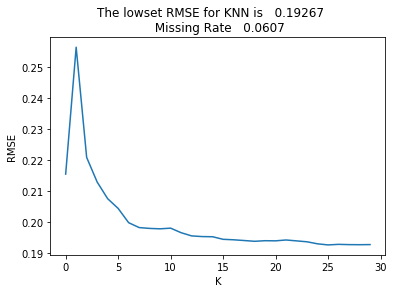

The RMSE for KNN is   0.19267    
Missing Rate   0.0607
The RMSE for IterativeImputer is   0.18203    
Missing Rate   0.0607
The RMSE for SoftImpute is   0.18827    
Missing Rate   0.0607
mean 0.21255605136630465
median 0.22540599296254846
most_frequent 0.2623315708333245


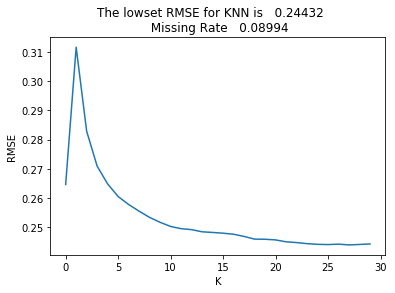

The RMSE for KNN is   0.24432    
Missing Rate   0.08994
The RMSE for IterativeImputer is   0.23242    
Missing Rate   0.08994
The RMSE for SoftImpute is   0.2344    
Missing Rate   0.08994
mean 0.2610219832919872
median 0.2760656323553489
most_frequent 0.3225964217386245


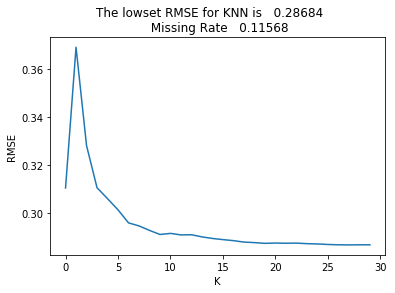

The RMSE for KNN is   0.28684    
Missing Rate   0.11568
The RMSE for IterativeImputer is   0.26444    
Missing Rate   0.11568
The RMSE for SoftImpute is   0.27447    
Missing Rate   0.11568
mean 0.3067782695216427
median 0.32569922682869107
most_frequent 0.36840831165883264


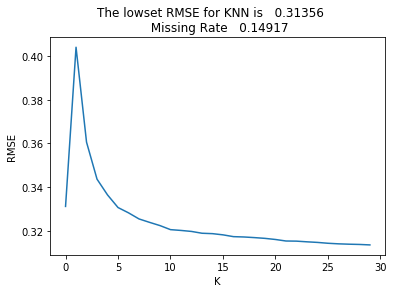

The RMSE for KNN is   0.31356    
Missing Rate   0.14917
The RMSE for IterativeImputer is   0.29233    
Missing Rate   0.14917
The RMSE for SoftImpute is   0.29664    
Missing Rate   0.14917
mean 0.3279440980895149
median 0.3509487393784586
most_frequent 0.40907132817348374


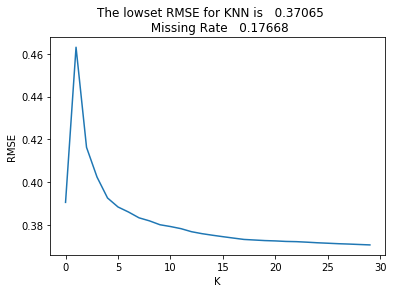

The RMSE for KNN is   0.37065    
Missing Rate   0.17668
The RMSE for IterativeImputer is   0.34875    
Missing Rate   0.17668
The RMSE for SoftImpute is   0.35429    
Missing Rate   0.17668
mean 0.3864667768888602
median 0.41130269364147765
most_frequent 0.46797193934523906


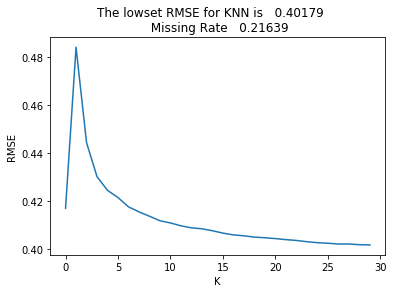

The RMSE for KNN is   0.40179    
Missing Rate   0.21639
The RMSE for IterativeImputer is   0.38815    
Missing Rate   0.21639
The RMSE for SoftImpute is   0.37987    
Missing Rate   0.21639
mean 0.41199126068419506
median 0.4424693160632896
most_frequent 0.5061307347463833


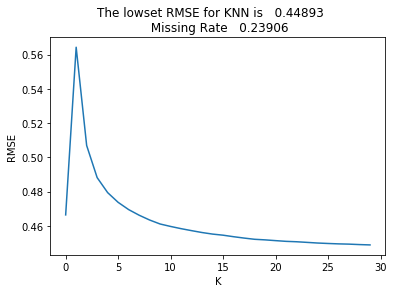

The RMSE for KNN is   0.44893    
Missing Rate   0.23906
The RMSE for IterativeImputer is   0.43391    
Missing Rate   0.23906
The RMSE for SoftImpute is   0.42596    
Missing Rate   0.23906
mean 0.4606952909697452
median 0.48881373914641263
most_frequent 0.5578087498861115


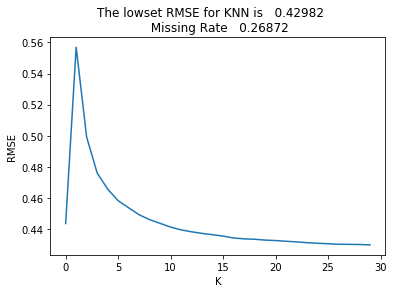

The RMSE for KNN is   0.42982    
Missing Rate   0.26872
The RMSE for IterativeImputer is   0.58376    
Missing Rate   0.26872
The RMSE for SoftImpute is   0.40807    
Missing Rate   0.26872
mean 0.4374821604246302
median 0.47006782853640455
most_frequent 0.5739700890643017


In [139]:
# Prediction with KNN

from sklearn.metrics import mean_squared_error
from fancyimpute import KNN 
import matplotlib.pyplot as plt
rms_all = pd.DataFrame(columns=['KNN', 'IterativeImputer', 'SoftImpute','mean','median','most_frequent'],
                      index=missing_rate_list)

for i, df_complete_sampled in enumerate(df_complete_sampled_list):
    tar_miss_rate = missing_rate_list[i]

    rms_list = []

    for k in range(30):
        df_predicted = pd.DataFrame(KNN(k,verbose=False).fit_transform(df_complete_sampled))

        rms = np.sqrt(mean_squared_error(df_predicted, df_complete))
        rms_list.append(rms)

    #result of KNN

    plt.plot(rms_list)
    plt.ylabel('RMSE')
    plt.xlabel('K')
    plt.title("The lowset RMSE for KNN is   "+str( round(rms, 5) )  +"    \n Missing Rate   "+str(round(tar_miss_rate, 5)))
    plt.show()

    print("The RMSE for KNN is   "+str( round(rms, 5) )  +"    \nMissing Rate   "+str(round(tar_miss_rate, 5)))
    rms_all["KNN"][tar_miss_rate] = round(rms, 5) 

    # Prediction with IterativeImputer (MICE)

    from fancyimpute import IterativeImputer 

    df_predicted = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df_complete_sampled))
    rms = np.sqrt(mean_squared_error(df_predicted, df_complete))

    rms_all["IterativeImputer"][tar_miss_rate] = round(rms, 5) 
    print("The RMSE for IterativeImputer is   "+str( round(rms, 5) )  +"    \nMissing Rate   "+str(round(tar_miss_rate, 5)))

    # Prediction with SoftImpute 

    from fancyimpute import SoftImpute 

    df_predicted = pd.DataFrame(SoftImpute(verbose=False).fit_transform(df_complete_sampled))
    rms = np.sqrt(mean_squared_error(df_predicted, df_complete))

    rms_all["SoftImpute"][tar_miss_rate] = round(rms, 5) 
    print("The RMSE for SoftImpute is   "+str( round(rms, 5) )  +"    \nMissing Rate   "+str(round(tar_miss_rate, 5)))

    #Prediction with 'mean','median','most_frequent'

    # https://scikit-learn.org/stable/modules/impute.html#impute
    from sklearn.impute import SimpleImputer

    for stra in ['mean','median','most_frequent']:

        imp = SimpleImputer(missing_values=np.nan, strategy=stra)
        imp.fit(df_complete_sampled)
        df_predicted = imp.transform(df_complete_sampled)

        rms = np.sqrt(mean_squared_error(df_predicted, df_complete))
        print(stra, rms)
        rms_all[stra][tar_miss_rate] = round(rms, 5) 

In [140]:
rms_all

,KNN,IterativeImputer,SoftImpute,mean,median,most_frequent
0.060702,0.19267,0.18203,0.18827,0.21256,0.22541,0.26233
0.089938,0.24432,0.23242,0.2344,0.26102,0.27607,0.3226
0.115682,0.28684,0.26444,0.27447,0.30678,0.3257,0.36841
0.149167,0.31356,0.29233,0.29664,0.32794,0.35095,0.40907
0.176678,0.37065,0.34875,0.35429,0.38647,0.4113,0.46797
0.216389,0.40179,0.38815,0.37987,0.41199,0.44247,0.50613
0.239063,0.44893,0.43391,0.42596,0.4607,0.48881,0.55781
0.268720,0.42982,0.58376,0.40807,0.43748,0.47007,0.57397


Text(0.5, 0, 'Missing Rate')

<Figure size 432x288 with 0 Axes>

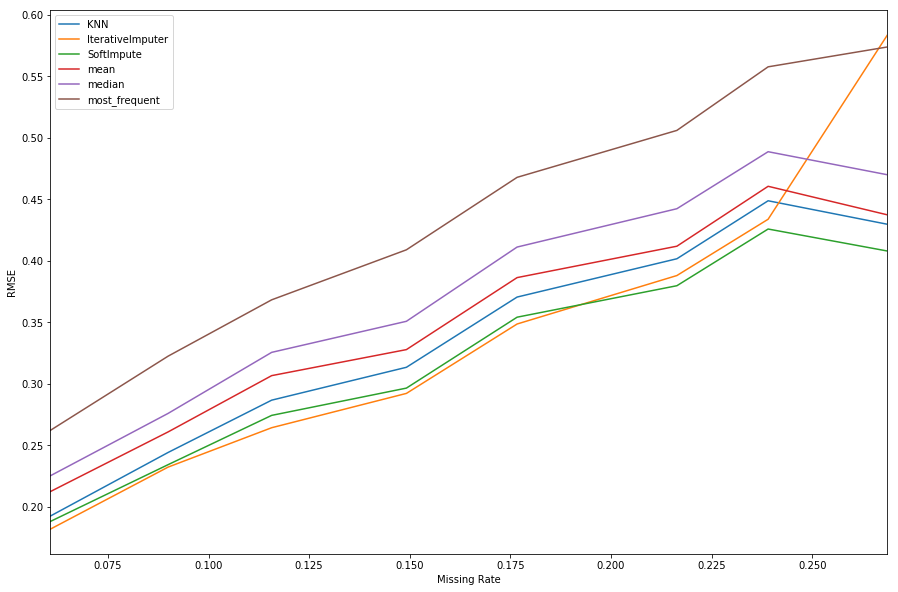

In [168]:
plt.figure()
rms_all.plot(figsize=(15, 10))
plt.ylabel('RMSE')
plt.xlabel('Missing Rate')

# Do the Prediction for missing values

In [26]:
#creating df df_pred to do prediction for those with non-nan values > 2000
predicting_list = []
for col in df:
    print(col,df[col].count())
    if (df[col].count() > 2000):
        predicting_list.append(col)
predicting_list.remove("revenue")


df_pred = pd.DataFrame()
df_pred = df[predicting_list].copy()

id 3000
budget 2188
original_language 3000
popularity 3000
release_date 3000
runtime 2986
revenue 3000
belongs_to_collection0 604
belongs_to_collection1 0
belongs_to_collection2 0
genres0 2993
genres1 2400
genres2 1428
production_companies0 2844
production_companies1 2069
production_companies2 1335
production_countries0 2945
production_countries1 723
production_countries2 198
spoken_languages0 2980
spoken_languages1 875
spoken_languages2 326
Keywords0 2724
Keywords1 2537
Keywords2 2330
cast0 2974
cast1 2958
cast2 2950
crew0 2984
crew1 2840
crew2 2668


In [27]:
#cause knn dosent accept a string heading, so changng the heading
df_pred.columns = range(df_pred.shape[1])
df_pred.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,-1.731474,-0.419613,-0.317964,-0.155998,0.968522,-0.726722,-0.052061,NaN,-0.412076,-0.661337,...,-0.242426,-0.171080,-0.287971,1.397179,0.086944,-0.044792,-0.383153,5.278119,2.493693,1.418793
1,-1.730319,0.226211,-0.317964,-0.017714,0.282080,0.223861,-0.077615,-0.525260,-0.412264,NaN,...,-0.242426,-0.225587,-0.392639,-0.758298,0.104177,0.755727,3.190937,-0.329904,-0.477054,-0.805095
2,-1.729164,-0.685394,-0.317964,4.613849,0.944809,-0.156372,-0.077615,NaN,-0.198968,-0.460341,...,-0.242426,-0.257262,-0.445748,1.731167,-0.179603,-0.341357,-0.487991,3.892715,2.431689,1.352192
3,-1.728009,-0.737557,-0.078653,-0.436981,0.776318,0.651624,-0.077615,-0.521066,NaN,NaN,...,-0.242426,0.008119,-0.247829,-0.651415,-0.061500,-0.079385,1.722394,0.049947,NaN,NaN
4,-1.726855,NaN,0.160657,-0.604463,0.575200,0.461507,-0.062583,-0.521066,NaN,NaN,...,2.343556,NaN,NaN,NaN,0.118839,-0.080517,-0.415392,0.006599,NaN,NaN


In [28]:
#checking if everything is in float for df
for x in df:
    for y in range(len(df)):
        if not (isinstance(df[x][y], float) or isinstance(df[x][y], int) or math.isnan(float(df[x][y]))):
            print(x,y,df[x][y],type(df[x][y]))

In [29]:
# finally doing the prediction lol ==" i want to cry
now = time.time()
from fancyimpute import KNN 
df_pred = pd.DataFrame(IterativeImputer(verbose=False).fit_transform(df_pred))
print(time.time() - now)

Using TensorFlow backend.


Imputing row 1/3000 with 1 missing, elapsed time: 1.701
Imputing row 101/3000 with 0 missing, elapsed time: 1.706
Imputing row 201/3000 with 0 missing, elapsed time: 1.710
Imputing row 301/3000 with 0 missing, elapsed time: 1.714
Imputing row 401/3000 with 0 missing, elapsed time: 1.718
Imputing row 501/3000 with 1 missing, elapsed time: 1.723
Imputing row 601/3000 with 1 missing, elapsed time: 1.726
Imputing row 701/3000 with 0 missing, elapsed time: 1.730
Imputing row 801/3000 with 0 missing, elapsed time: 1.733
Imputing row 901/3000 with 0 missing, elapsed time: 1.737
Imputing row 1001/3000 with 2 missing, elapsed time: 1.741
Imputing row 1101/3000 with 3 missing, elapsed time: 1.745
Imputing row 1201/3000 with 2 missing, elapsed time: 1.749
Imputing row 1301/3000 with 1 missing, elapsed time: 1.753
Imputing row 1401/3000 with 1 missing, elapsed time: 1.757
Imputing row 1501/3000 with 0 missing, elapsed time: 1.761
Imputing row 1601/3000 with 0 missing, elapsed time: 1.765
Imputing 

In [30]:
#adding back the columns for df_pred
df_pred.columns = predicting_list

In [31]:
#merging df with df_pred
for col in df_pred:
    df[col] = df_pred[col]

In [32]:
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.731474,-0.419613,-0.317964,-0.155998,0.968522,-0.726722,-0.395691,1.432121,NaN,NaN,...,NaN,-0.171080,-0.287971,1.397179,0.086944,-0.044792,-0.383153,5.278119,2.493693,1.418793
1,-1.730319,0.226211,-0.317964,-0.017714,0.282080,0.223861,0.206703,-0.139912,NaN,NaN,...,NaN,-0.225587,-0.392639,-0.758298,0.104177,0.755727,3.190937,-0.329904,-0.477054,-0.805095
2,-1.729164,-0.685394,-0.317964,4.613849,0.944809,-0.156372,-0.390038,NaN,NaN,NaN,...,NaN,-0.257262,-0.445748,1.731167,-0.179603,-0.341357,-0.487991,3.892715,2.431689,1.352192
3,-1.728009,-0.737557,-0.078653,-0.436981,0.776318,0.651624,-0.368890,NaN,NaN,NaN,...,NaN,0.008119,-0.247829,-0.651415,-0.061500,-0.079385,1.722394,0.049947,-0.440409,-0.767638
4,-1.726855,-0.689443,0.160657,-0.604463,0.575200,0.461507,-0.456710,NaN,NaN,NaN,...,NaN,-0.239477,-0.310679,0.990308,0.118839,-0.080517,-0.415392,0.006599,0.758314,0.438499


In [33]:
# save to save.csv
df.to_csv('save_Predicted.csv',index_label = False)
df0 = pd.read_csv('save_Cleaned.csv')
df1 = pd.read_csv('save_Predicted.csv')

In [34]:
df0.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.731474,-0.419613,-0.317964,-0.155998,0.968522,-0.726722,-0.395691,1.432121,NaN,NaN,...,NaN,-0.171080,-0.287971,1.397179,0.086944,-0.044792,-0.383153,5.278119,2.493693,1.418793
1,-1.730319,0.226211,-0.317964,-0.017714,0.282080,0.223861,0.206703,-0.139912,NaN,NaN,...,NaN,-0.225587,-0.392639,-0.758298,0.104177,0.755727,3.190937,-0.329904,-0.477054,-0.805095
2,-1.729164,-0.685394,-0.317964,4.613849,0.944809,-0.156372,-0.390038,NaN,NaN,NaN,...,NaN,-0.257262,-0.445748,1.731167,-0.179603,-0.341357,-0.487991,3.892715,2.431689,1.352192
3,-1.728009,-0.737557,-0.078653,-0.436981,0.776318,0.651624,-0.368890,NaN,NaN,NaN,...,NaN,0.008119,-0.247829,-0.651415,-0.061500,-0.079385,1.722394,0.049947,NaN,NaN
4,-1.726855,NaN,0.160657,-0.604463,0.575200,0.461507,-0.456710,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.118839,-0.080517,-0.415392,0.006599,NaN,NaN


In [35]:
df.head()

,id,budget,original_language,popularity,release_date,runtime,revenue,belongs_to_collection0,belongs_to_collection1,belongs_to_collection2,...,spoken_languages2,Keywords0,Keywords1,Keywords2,cast0,cast1,cast2,crew0,crew1,crew2
0,-1.731474,-0.419613,-0.317964,-0.155998,0.968522,-0.726722,-0.395691,1.432121,NaN,NaN,...,NaN,-0.171080,-0.287971,1.397179,0.086944,-0.044792,-0.383153,5.278119,2.493693,1.418793
1,-1.730319,0.226211,-0.317964,-0.017714,0.282080,0.223861,0.206703,-0.139912,NaN,NaN,...,NaN,-0.225587,-0.392639,-0.758298,0.104177,0.755727,3.190937,-0.329904,-0.477054,-0.805095
2,-1.729164,-0.685394,-0.317964,4.613849,0.944809,-0.156372,-0.390038,NaN,NaN,NaN,...,NaN,-0.257262,-0.445748,1.731167,-0.179603,-0.341357,-0.487991,3.892715,2.431689,1.352192
3,-1.728009,-0.737557,-0.078653,-0.436981,0.776318,0.651624,-0.368890,NaN,NaN,NaN,...,NaN,0.008119,-0.247829,-0.651415,-0.061500,-0.079385,1.722394,0.049947,-0.440409,-0.767638
4,-1.726855,-0.689443,0.160657,-0.604463,0.575200,0.461507,-0.456710,NaN,NaN,NaN,...,NaN,-0.239477,-0.310679,0.990308,0.118839,-0.080517,-0.415392,0.006599,0.758314,0.438499
